In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [23]:
# Load the data
data = pd.read_csv ('3.12. Example.csv')

In [24]:
# Check what's inside
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Create a preliminary plot to see if you can spot something

Text(0, 0.5, 'Loyalty')

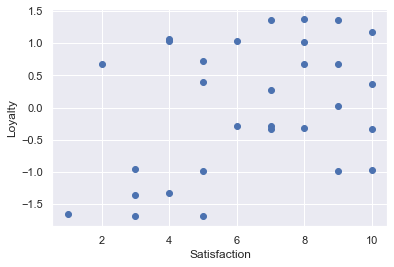

In [25]:
# We are creating a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Name your axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [26]:
x = data.copy()


## Clustering

In [27]:
kmeans = KMeans(2)
kmeans.fit(x)


KMeans(n_clusters=2)

## Clustering results

In [28]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

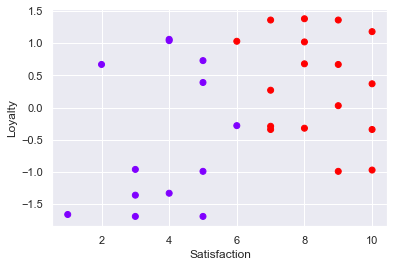

In [29]:
# We are creating a scatter plot of the two variables
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c=clusters['cluster_pred'],cmap='rainbow')
# Name your axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

In [30]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [31]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[229.16347000000002,
 74.51511402714934,
 49.467933333333335,
 34.42895833333333,
 27.229510833333332,
 21.84828333333333,
 18.207266666666673,
 14.437368333333332,
 11.027293333333331]

In [32]:
df_wcss_cluster = pd.DataFrame()
df_wcss_cluster['WCSS'] = wcss
df_wcss_cluster['No. of Cluster'] = list(range(1,10))
df_wcss_cluster

,WCSS,No. of Cluster
0,229.163470,1
1,74.515114,2
2,49.467933,3
3,34.428958,4
4,27.229511,5
5,21.848283,6
6,18.207267,7
7,14.437368,8
8,11.027293,9


Text(0, 0.5, 'WCSS')

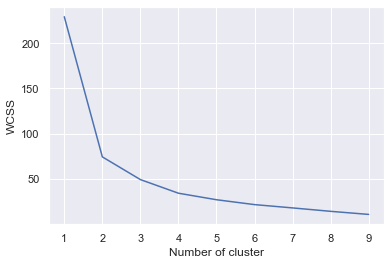

In [33]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')

We can see the change and we can try at 2, 3, 4, 5 clusters, but we dont really know which solution is the best one.

 ## Explore clustering solutions and select the number of clusters

In [34]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [35]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

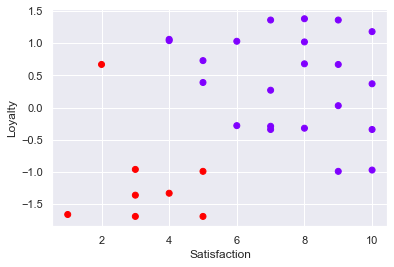

In [36]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

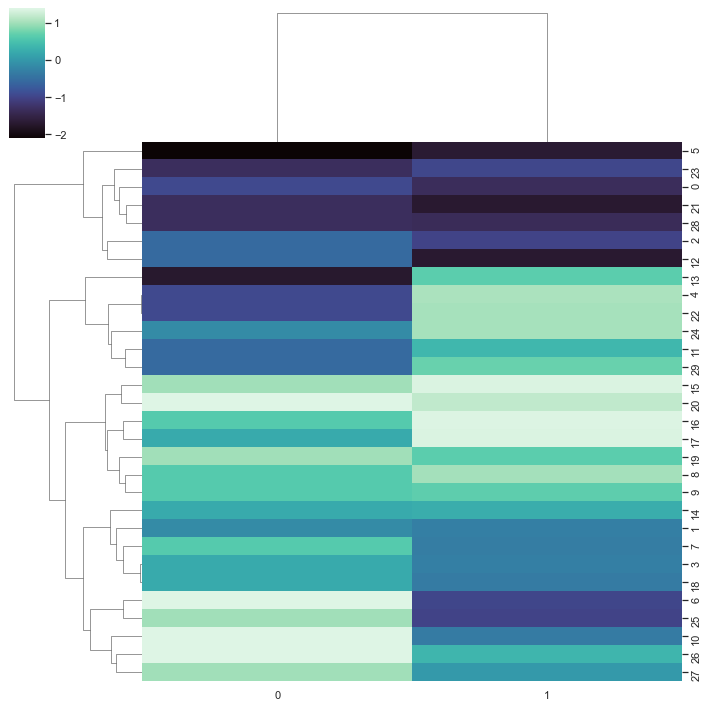

In [38]:
sns.clustermap(x_scaled, cmap='mako')